Coupon Analytics

In [16]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
# read data csv
data = pd.read_csv('coupons.csv')

In [34]:
# dataframe information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [19]:
#show 5 rows of data 
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [20]:
# check null values on dataframe
null_values = data.isnull().sum()
print(null_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [21]:
# drop car column
data.drop(columns=['car'], inplace=True)

In [23]:
# check if the car column has been drop or not
null_values = data.isnull().sum()
print(null_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [27]:
# fill the null value on bar column with mode
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)

# check if there's still null value or not on bar column
null_values = data.isnull().sum()
print(null_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [28]:
# replace null value on coffeehouse column using mode 
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)

# check if there's still null values or not on coffeehouse column
null_values = data.isnull().sum()
print(null_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_63098/722775954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)


In [29]:
# replace null value on CarryAway column using mode 
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)

# check if there's still null values or not on CarryAway column
null_values = data.isnull().sum()
print(null_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_63098/2123667263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)


In [30]:
# replace missing value on RestaurantLessThan20 with mode values
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)

# check if there's still null values or not on RestaurantLessThan20 column
null_values = data.isnull().sum()
print(null_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20      0
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_63098/408671661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)


In [31]:
# replace missing value on RestaurantLess20To50 with mode values
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)

# check if there's still missing values on RestaurantLess20To50 column
null_values = data.isnull().sum()
print(null_values)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_63098/3499233961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)


In [39]:
#convert data type column that has categorical data
data = data.astype({'toCoupon_GEQ5min': 'object', 'toCoupon_GEQ15min': 'object', 'toCoupon_GEQ25min': 'object', 
                   'direction_same': 'object', 'direction_opp': 'object', 'Y': 'object'})

In [40]:
#check if data type already change or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

<Axes: xlabel='Y', ylabel='Count'>

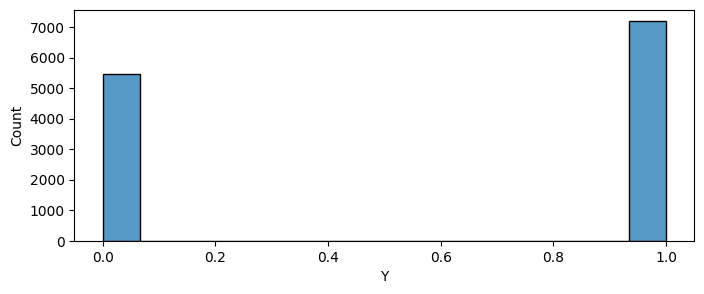

In [163]:
plt.figure(figsize=(8,3))
sns.histplot(data=data, x='Y')

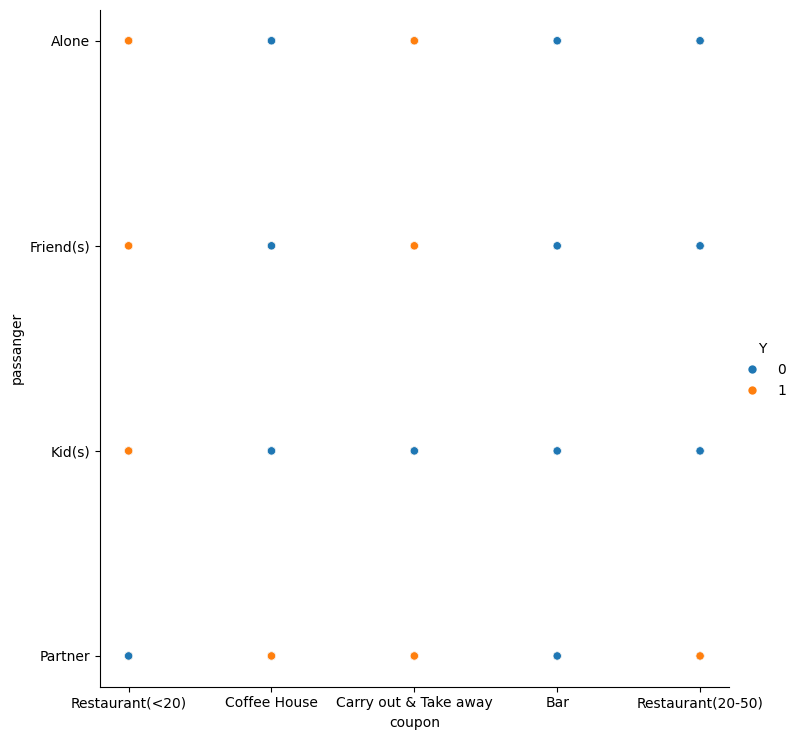

In [108]:
#graphic show about coupon and passanger
sns.relplot(data=data , x='coupon', y='passanger', hue='Y', height=7.5, aspect=1)

<Axes: xlabel='coupon', ylabel='temperature'>

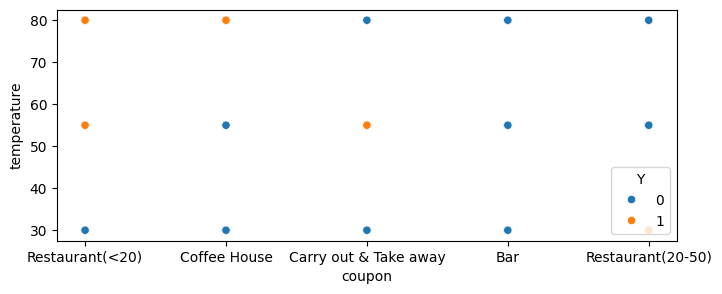

In [116]:
#graphic show about coupon and temperature
plt.figure(figsize=(8,3))
sns.scatterplot(data=data , x='Y', y='temperature', hue='Y')

<Axes: xlabel='coupon', ylabel='expiration'>

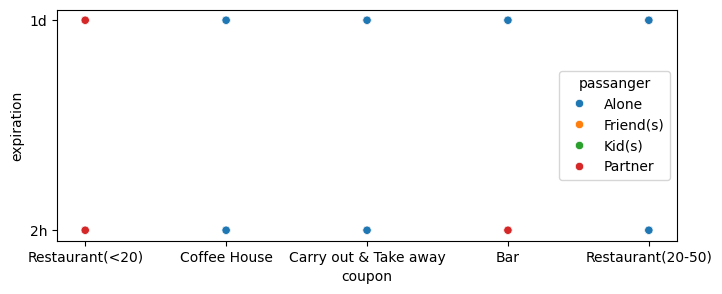

In [114]:
#graphic show about expiration and coupon
plt.figure(figsize=(8,3))
sns.scatterplot(data=data , x='coupon', y='expiration', hue='passanger')

<Axes: xlabel='coupon', ylabel='weather'>

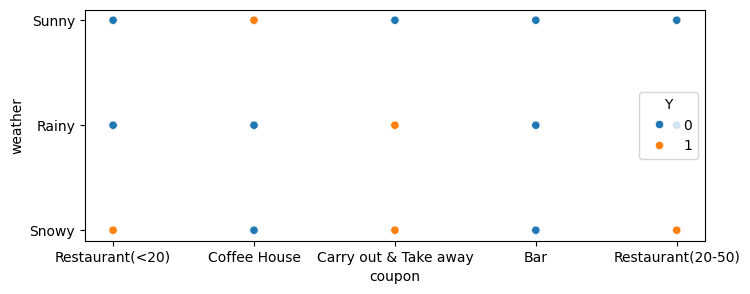

In [157]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=data , x='coupon', y='weather', hue='Y')

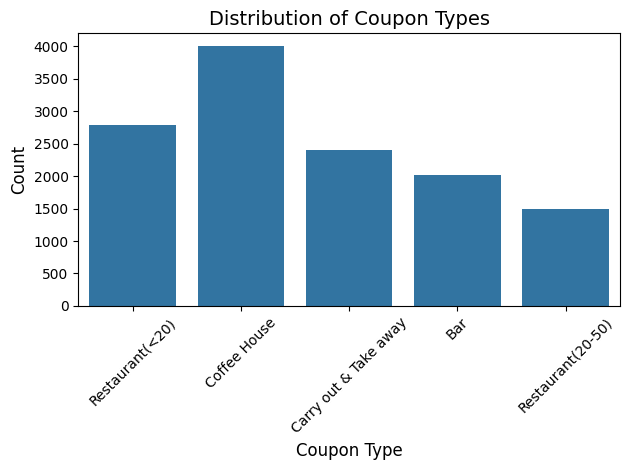

In [117]:
sns.countplot(x='coupon', data=data)

# Add title and labels
plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

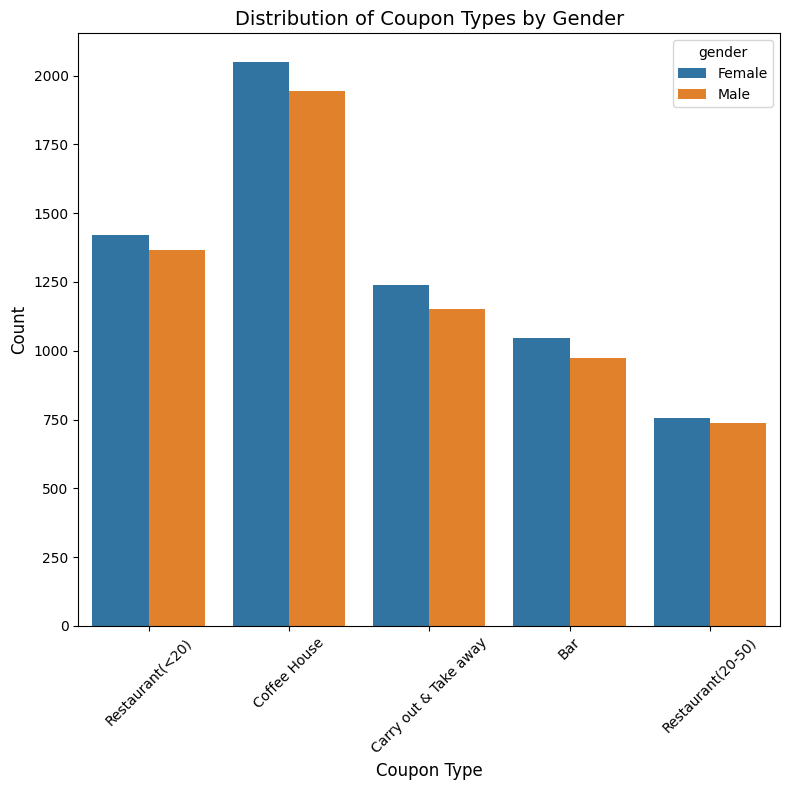

In [120]:
# Set the size of the plot for better visibility
plt.figure(figsize=(8, 8))

# Plot the distribution of coupons by gender
sns.countplot(x='coupon', hue='gender', data=data)

# Add title and labels
plt.title('Distribution of Coupon Types by Gender', fontsize=14)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

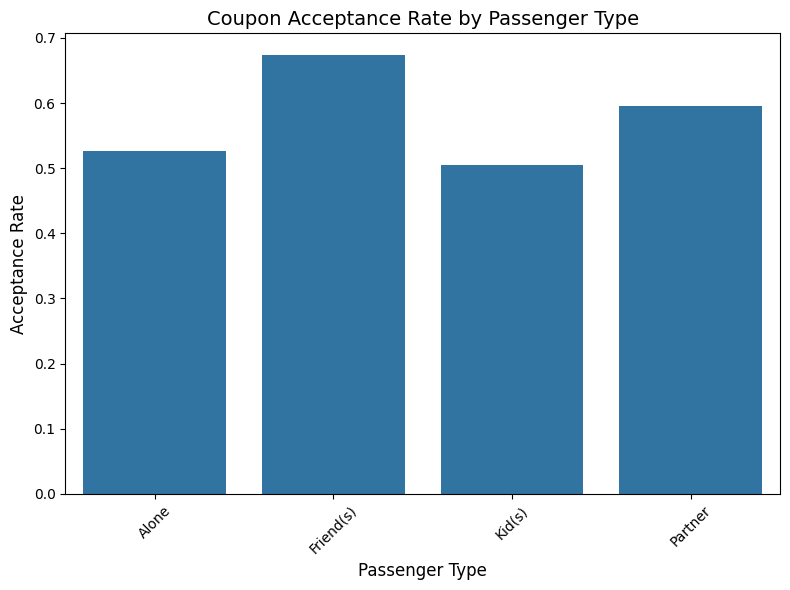

In [122]:
acceptance_rate_by_passenger = data.groupby('passanger')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_passenger.columns = ['Passenger', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by passenger type
plt.figure(figsize=(8, 6))
sns.barplot(x='Passenger', y='Coupon Acceptance Rate', data=acceptance_rate_by_passenger)

# Add title and labels
plt.title('Coupon Acceptance Rate by Passenger Type', fontsize=14)
plt.xlabel('Passenger Type', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

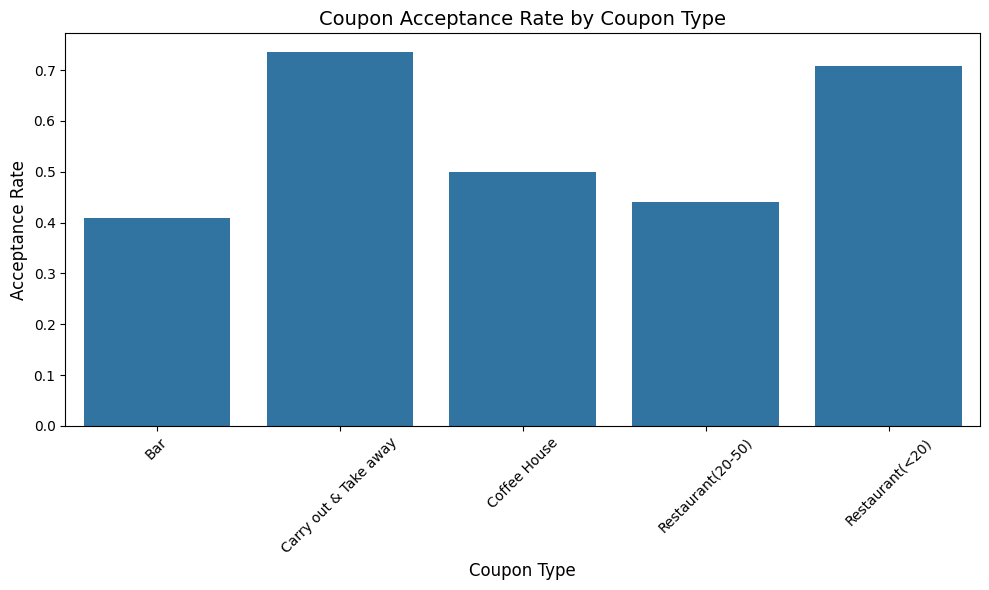

In [132]:
# Calculate the acceptance rate by coupon type
acceptance_rate_by_coupon = data.groupby('coupon')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_coupon.columns = ['Coupon Type', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by coupon type
plt.figure(figsize=(10, 6))
sns.barplot(x='Coupon Type', y='Coupon Acceptance Rate', data=acceptance_rate_by_coupon)

# Add title and labels
plt.title('Coupon Acceptance Rate by Coupon Type', fontsize=14)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Distribution of coupon acceptance by coupon type 

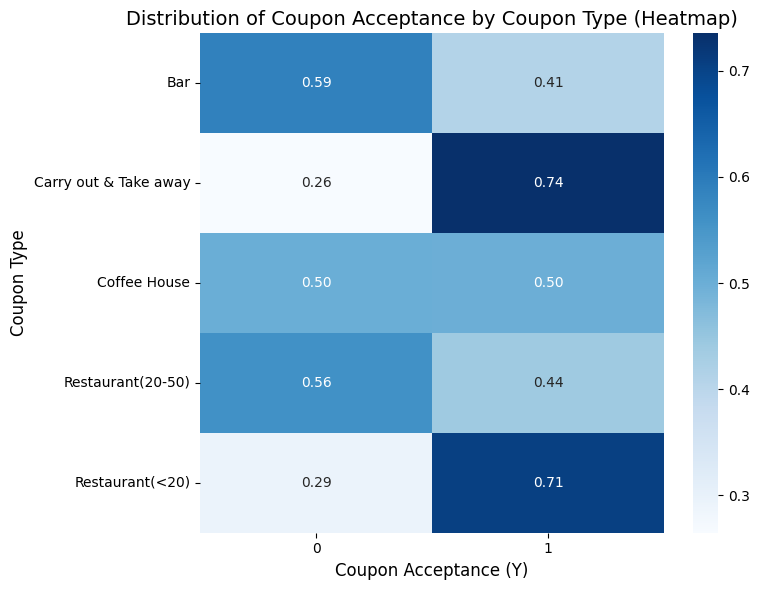

In [133]:
# Create a pivot table for the heatmap
coupon_acceptance_pivot = data.pivot_table(index='coupon', columns='Y', aggfunc='size', fill_value=0)

# Normalize to get the distribution of accepted coupons
coupon_acceptance_pivot_normalized = coupon_acceptance_pivot.div(coupon_acceptance_pivot.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(coupon_acceptance_pivot_normalized, annot=True, cmap="Blues", fmt='.2f')

# Add title and labels
plt.title('Distribution of Coupon Acceptance by Coupon Type (Heatmap)', fontsize=14)
plt.xlabel('Coupon Acceptance (Y)', fontsize=12)
plt.ylabel('Coupon Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more

/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_63098/1159757121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Bar'] = data['Bar'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})


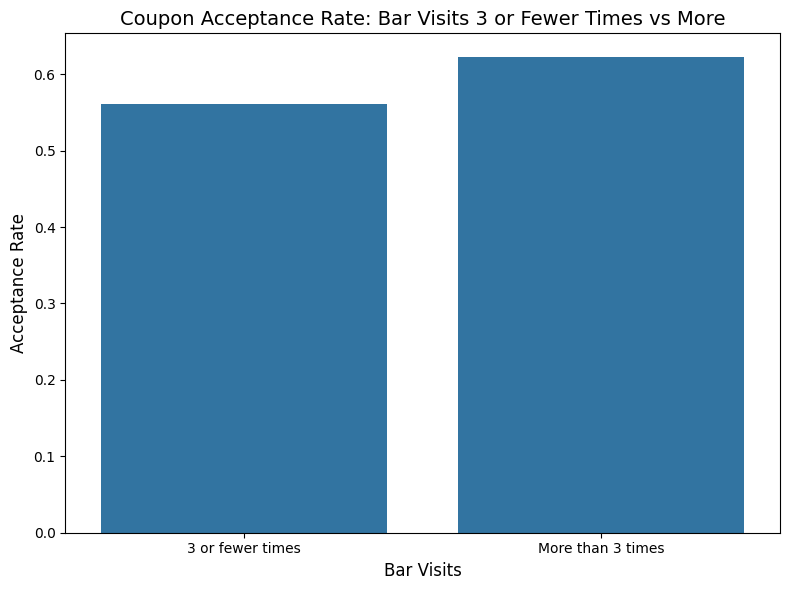

In [134]:
# Create two groups based on the frequency of visiting bars
data['Bar'] = data['Bar'].replace({'never': 0, 'less1': 1, '1~3': 3, '4~8': 4, 'gt8': 8})

# Create two categories: those who went to the bar 3 or fewer times and those who went more
bar_group = data.copy()
bar_group['Bar_Group'] = ['3 or fewer times' if x <= 3 else 'More than 3 times' for x in bar_group['Bar']]

# Calculate the acceptance rate for both groups
acceptance_rate_by_bar_group = bar_group.groupby('Bar_Group')['Y'].mean().reset_index()

# Visualize the acceptance rate comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Bar_Group', y='Y', data=acceptance_rate_by_bar_group)

# Add title and labels
plt.title('Coupon Acceptance Rate: Bar Visits 3 or Fewer Times vs More', fontsize=14)
plt.xlabel('Bar Visits', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [138]:
# Filter data based on the specified conditions
filtered_data = data[
    (data['Bar'] > 1) &  # More than once a month
    (data['passanger'] != 'Kid(s)') &  # Passengers that were not kids
    (~data['occupation'].isin(['Farming, Fishing, & Forestry']))  # Occupations other than farming, fishing, or forestry
]

# Calculate the acceptance rate for this filtered group
acceptance_rate_filtered = filtered_data['Y'].mean()

# Display the acceptance rate
acceptance_rate_filtered

np.float64(0.6231060606060606)

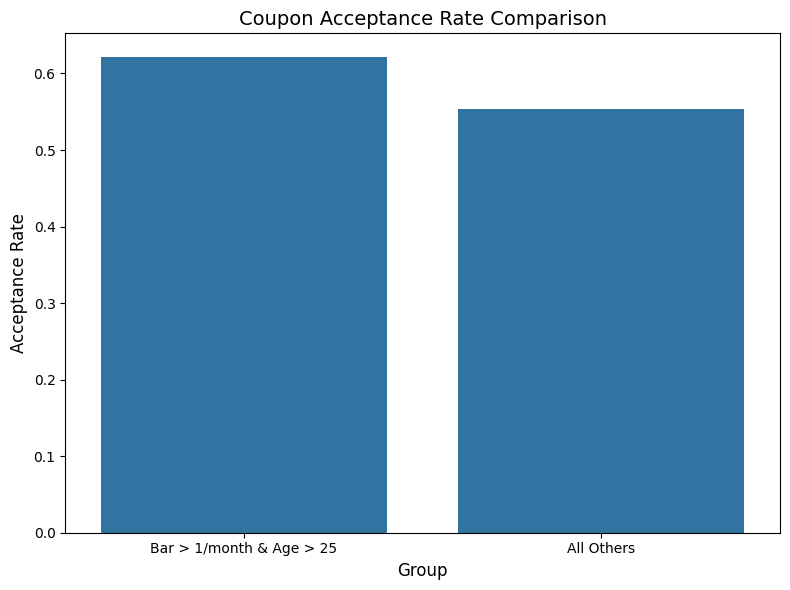

In [141]:
# We will filter directly based on age by selecting appropriate ranges
# Convert 'age' to string type and filter
group_1 = data[(data['Bar'] > 1) & (data['age'].astype(str) > '25')]
group_2 = data[~((data['Bar'] > 1) & (data['age'].astype(str) > '25'))]

# Calculate acceptance rate for both groups
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Create a dataframe to hold the two groups and their acceptance rates
acceptance_rate_comparison = pd.DataFrame({
    'Group': ['Bar > 1/month & Age > 25', 'All Others'],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2]
})

# Plot the acceptance rates comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_comparison)

# Add title and labels
plt.title('Coupon Acceptance Rate Comparison', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

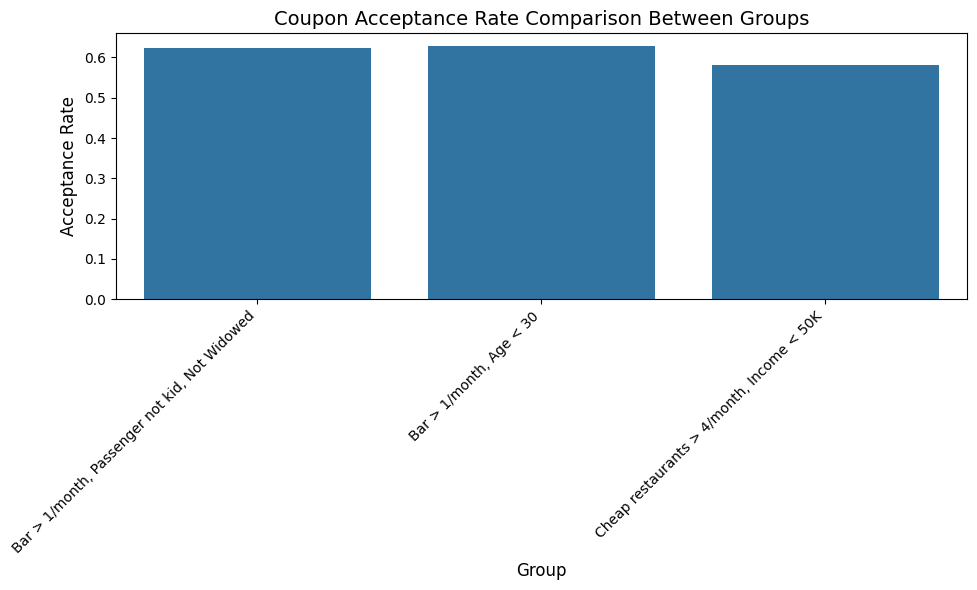

In [144]:
# Define the conditions for each group based on the criteria provided

# Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1 = data[
    (data['Bar'] > 1) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to bars more than once a month and are under the age of 30
group_2 = data[
    (data['Bar'] > 1) &
    (data['age'].astype(str) < '30')
]

# Group 3: Drivers who go to cheap restaurants (less than $20) more than 4 times a month and have an income of less than $50K
group_3 = data[
    (data['RestaurantLessThan20'].astype(str) > '4') &
    (data['income'].astype(str) < '$50000')
]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

# Create a dataframe to hold the groups and their acceptance rates
acceptance_rate_comparison = pd.DataFrame({
    'Group': [
        'Bar > 1/month, Passenger not kid, Not Widowed',
        'Bar > 1/month, Age < 30',
        'Cheap restaurants > 4/month, Income < 50K'
    ],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]
})

# Plot the acceptance rates comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_comparison)

# Add title and labels
plt.title('Coupon Acceptance Rate Comparison Between Groups', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Investigate the Coffee House coupons

In [146]:
# Create a dataframe that contains only the Coffee House coupons
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House']

# Display the first few rows of the coffeehouse coupon dataframe
coffee_house_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


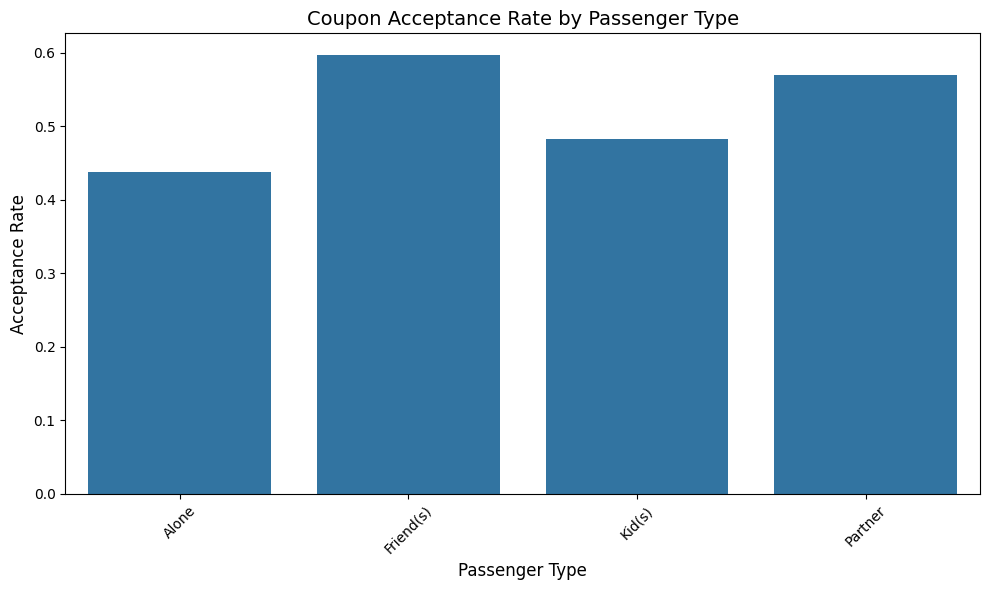

In [149]:
# Calculate the acceptance rate by passenger type
acceptance_rate_by_passenger = coffee_house_coupons_df.groupby('passanger')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_passenger.columns = ['Passenger Type', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by passenger type
plt.figure(figsize=(10, 6))
sns.barplot(x='Passenger Type', y='Coupon Acceptance Rate', data=acceptance_rate_by_passenger)

# Add title and labels
plt.title('Coupon Acceptance Rate by Passenger Type', fontsize=14)
plt.xlabel('Passenger Type', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

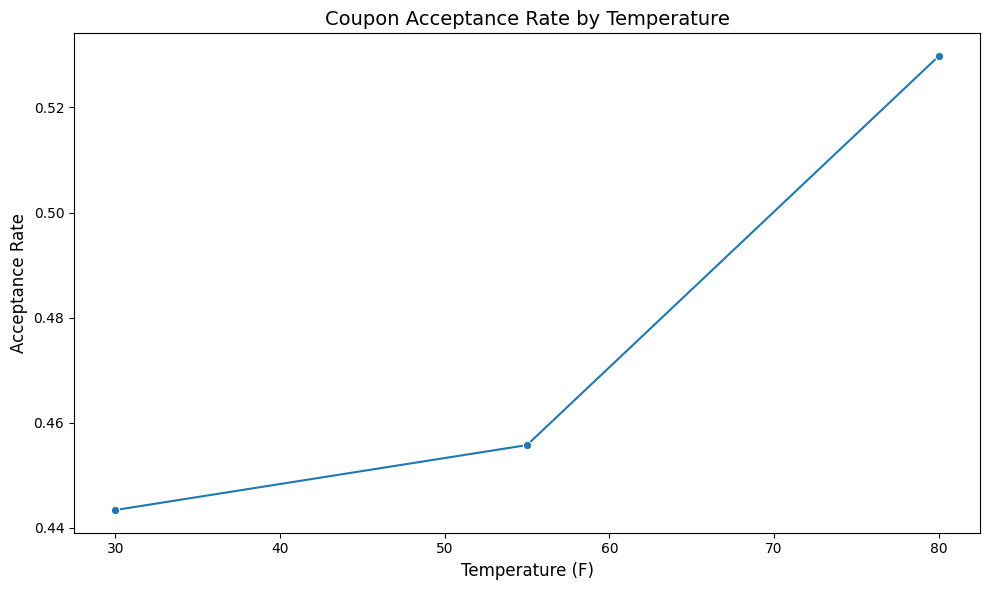

In [150]:
# Group the data by temperature and calculate the acceptance rate
acceptance_rate_by_temperature = coffee_house_coupons_df.groupby('temperature')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_temperature.columns = ['Temperature', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by temperature
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Coupon Acceptance Rate', data=acceptance_rate_by_temperature, marker='o')

# Add title and labels
plt.title('Coupon Acceptance Rate by Temperature', fontsize=14)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


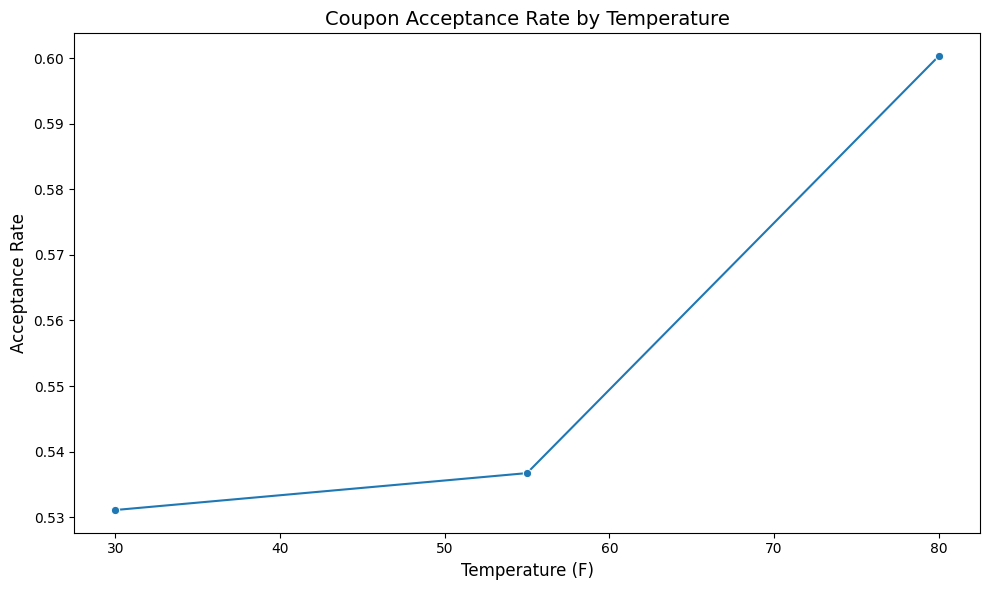

In [151]:
# Group the data by temperature and calculate the acceptance rate
acceptance_rate_by_temperature = data.groupby('temperature')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_temperature.columns = ['Temperature', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by temperature
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='Coupon Acceptance Rate', data=acceptance_rate_by_temperature, marker='o')

# Add title and labels
plt.title('Coupon Acceptance Rate by Temperature', fontsize=14)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [160]:
# Filter data for Coffee House coupons only
coffee_house_data = data[data['coupon'] == 'Coffee House']

# Calculate acceptance rates for snowy and rainy weather
snowy_rainy_data = coffee_house_data[coffee_house_data['weather'].isin(['Snowy', 'Rainy'])]
acceptance_rate_by_weather = snowy_rainy_data.groupby('weather')['Y'].mean().reset_index()

# Rename columns for clarity
acceptance_rate_by_weather.columns = ['Weather', 'Coupon Acceptance Rate']

# Display the acceptance rates for Snowy and Rainy weather
print(acceptance_rate_by_weather)

  Weather Coupon Acceptance Rate
0   Rainy               0.522124
1   Snowy               0.432343


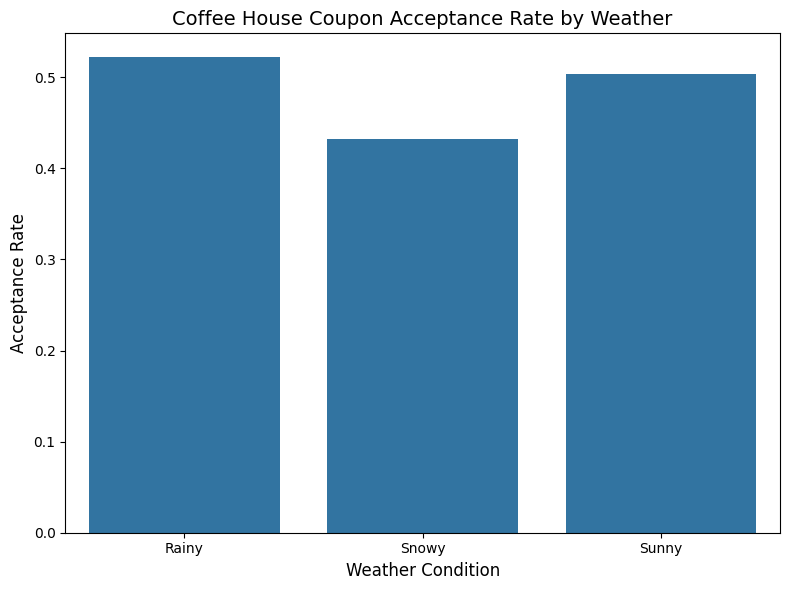

In [162]:
# Calculate the acceptance rate for Coffee House coupons under different weather conditions
coffee_house_weather_acceptance = coffee_house_data.groupby('weather')['Y'].mean().reset_index()

# Rename columns for clarity
coffee_house_weather_acceptance.columns = ['Weather', 'Coupon Acceptance Rate']

# Visualize the acceptance rate by weather for Coffee House coupons
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather', y='Coupon Acceptance Rate', data=coffee_house_weather_acceptance)

# Add title and labels
plt.title('Coffee House Coupon Acceptance Rate by Weather', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()